In this example we will take a look at the simulated data. Data was obtained using SPPARKS kinetic Monte-Carlo simulator for 2 phase ising model. The model is in 2D and the volume fraction of one phase is varied for different simulations. Microstructures are assumed to be periodic.


First, we load the data:

In [1]:
from pymks_share import DataManager
import numpy as np

manager = DataManager('pymks.me.gatech.edu')
X = manager.fetch_data('2 phase ising model')
Y = manager.fetch_data('Ising 30%')
Z = manager.fetch_data('ising 10%')
R1 = manager.fetch_data('Ising 40%_Run#1')
R2 = manager.fetch_data('Ising 40%_Run#3')
X.shape, R1.shape 

((201, 100, 100), (201, 100, 100), (201, 100, 100))

'X' refers to 50% volume fraction and the rest of the data has its volume fraction in its name.

Let's take a look how initial microstructures look like for three different volume fractions (50%, 30%, 10%) using draw_microstructures:

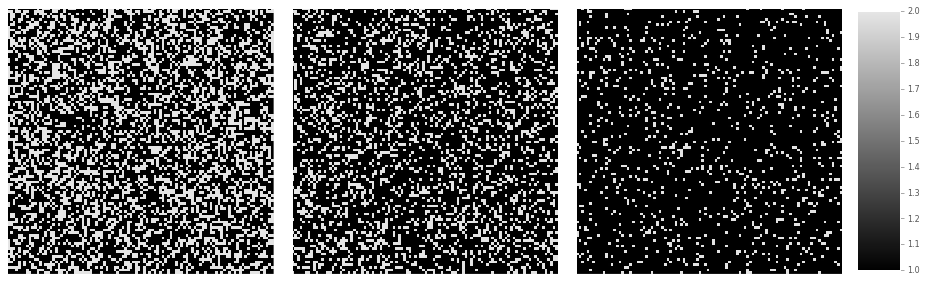

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt
from pymks.tools import draw_microstructures

X_examples = np.concatenate((X, Y, Z))
draw_microstructures((X_examples[::201]))

And the corresponding final microstructures after simulation (200 Monte-Carlo steps):

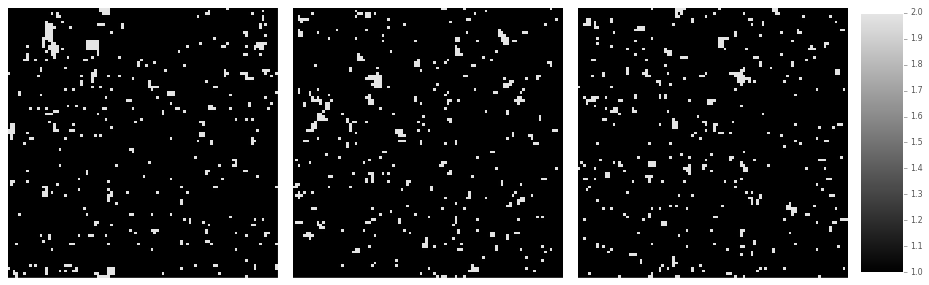

In [3]:
draw_microstructures((X_examples[200::201]))

So, this is a microstructure evolution problem, and final microstructures look very similar to my eyes. Can we check it using PyMKS tools? We have 200 files for each simulation, so we can also take a look at path each simulation takes.


To get started, we are going to perform 2-point statistics first for couple of microstructures using autocorrelate from pymks.stats :

In [42]:

from pymks.stats import autocorrelate
from pymks.stats import crosscorrelate
from pymks import PrimitiveBasis

prim_basis = PrimitiveBasis(n_states=2,domain=[1, 2])
X_ = prim_basis.discretize(X)
X_auto = autocorrelate(X_, periodic_axes=(0, 1))
X_cross = crosscorrelate(X_, periodic_axes=(0,1))

In [47]:
X_cross.shape, X_auto.shape, X_auto[:,:,:,1].shape


((201, 100, 100, 1), (201, 100, 100, 2), (201, 100, 100))

In [53]:
X_corr = np.squeeze(np.concatenate((X_cross, X_auto[:,:,:,0:1])))
Xcorr_reshape=np.reshape(X_corr,(402,10000))
Xcorr_reshape.shape

(402, 10000)

In [54]:
from sklearn.decomposition import PCA, KernelPCA


kpca = KernelPCA(n_components=5,kernel='linear')#, gamma=None, degree=3, coef0=1, kernel_params=None, alpha=1.0, 
           #      fit_inverse_transform=False, eigen_solver='auto', tol=0, max_iter=None, remove_zero_eig=False)
X_kpca = kpca.fit_transform(Xcorr_reshape)

The correlations can be plotted using draw_autocorrelations from pymks.tools. Here 10th step is plotted since initial is completely random microstructure and its statistics does not look exciting. But you can change around that 10 and take al ook at different simulation steps.

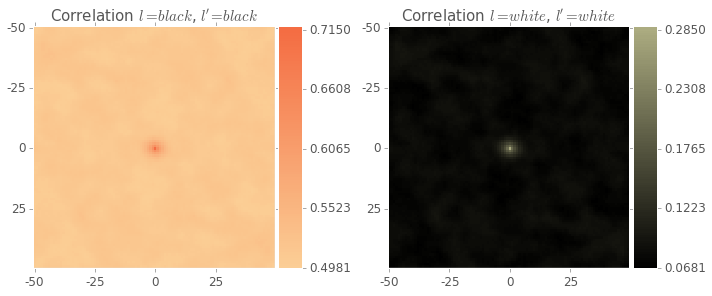

Volume fraction of black phase 0.6099
Volume fraction of white phase 0.3901


In [24]:

from pymks.tools import draw_autocorrelations

correlations = [('black', 'black'), ('white', 'white')]
draw_autocorrelations(X_auto[10], autocorrelations=correlations)

center = (X_auto.shape[2]) / 2
print 'Volume fraction of black phase', X_auto[0, center, center, 0]
print 'Volume fraction of white phase', X_auto[0, center, center, 1]

And the final microstructures do not look much interesting:

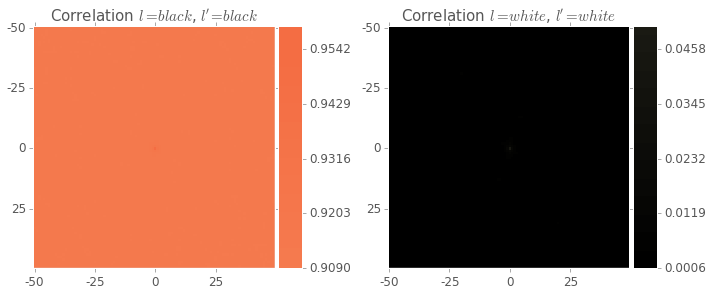

Volume fraction of black phase 0.9542
Volume fraction of white phase 0.0458


In [27]:
draw_autocorrelations(X_auto[200], autocorrelations=correlations)
print 'Volume fraction of black phase', X_auto[200, center, center, 0]
print 'Volume fraction of white phase', X_auto[200, center, center, 1]

In [3]:
from pymks import MKSStructureAnalysis
from pymks.bases import PrimitiveBasis
from sklearn.decomposition import FastICA
from sklearn.decomposition import RandomizedPCA

leg_basis = PrimitiveBasis(n_states=2, domain=[1, 2])
analyzer = MKSStructureAnalysis(basis=leg_basis, mean_center=False)

XY=np.concatenate((X, Y, Z))
XY.shape
#XYr = np.reshape(XY, (603,10000))
#XYr.shape
#pca = RandomizedPCA(n_components=3)
#XY_PCA = pca.fit_transform(XYr)
XY_PCA=analyzer.fit_transform(XY,periodic_axes=[0,1])
XY_PCA.shape

(603, 5)

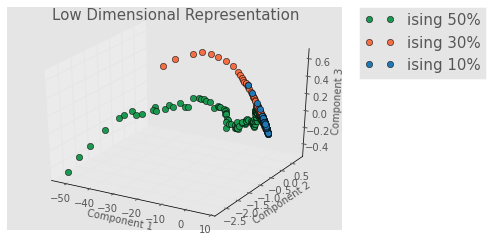

In [36]:
from pymks.tools import draw_components

draw_components([XY_PCA[0:201, :3],XY_PCA[201:402, :3],XY_PCA[402:603, :3]],
                ['ising 50%','ising 30%','ising 10%'])#,view_angles=(30,50))

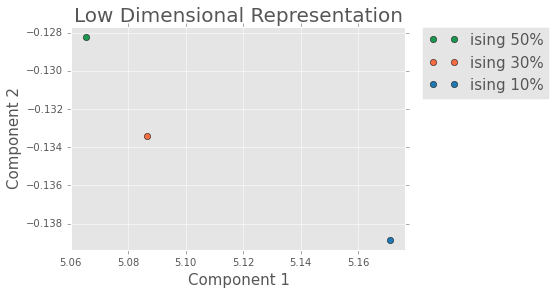

In [14]:
draw_components([XY_PCA[200:201, :2],XY_PCA[401:402, :2],XY_PCA[602:603, :2]],
                ['ising 50%','ising 30%','ising 10%'])

In [10]:
RR = np.concatenate((R1 , R2))
RR_PCA = analyzer.fit_transform(RR,periodic_axes=[0,1])



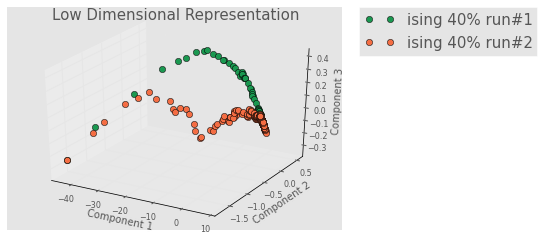

In [11]:
draw_components([RR_PCA[:201, :3],RR_PCA[201:402, :3]],
                ['ising 40% run#1','ising 40% run#2'])

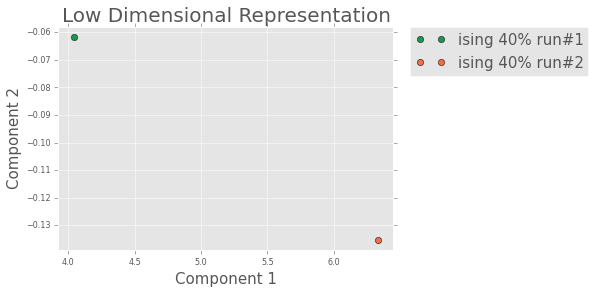

In [13]:
draw_components([RR_PCA[400:401, :2],RR_PCA[200, :2][None]],
                ['Final step run#1','Final step run#2'])

In [33]:
XY_reshape=np.reshape(XY,(603,10000))
XY_reshape.shape

(603, 10000)

In [38]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(n_components=5,kernel='linear')#, gamma=None, degree=3, coef0=1, kernel_params=None, alpha=1.0, 
           #      fit_inverse_transform=False, eigen_solver='auto', tol=0, max_iter=None, remove_zero_eig=False)
X_kpca = kpca.fit_transform(XY_reshape)
    

In [35]:
X_kpca.shape


(603, 3)

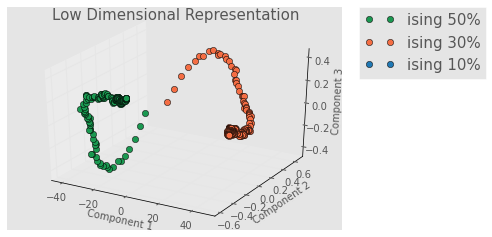

In [55]:
draw_components([X_kpca[0:201, :3],X_kpca[201:402, :3],X_kpca[402:603, :3]],
                ['ising 50%','ising 30%','ising 10%'])#,view_angles=(30,50))

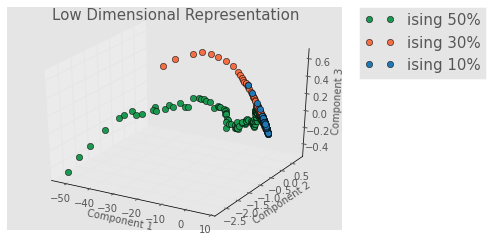

In [40]:
draw_components([XY_PCA[0:201, :3],XY_PCA[201:402, :3],XY_PCA[402:603, :3]],
                ['ising 50%','ising 30%','ising 10%'])#,view_angles=(30,50))